In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

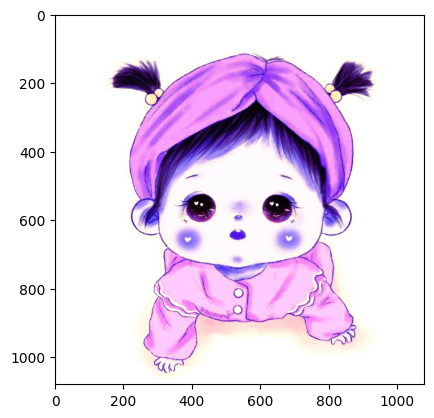

In [3]:
import cv2
import numpy as np

# Đọc ảnh I và ảnh J
image_I = cv2.imread('./baby.jpg')
image_J = cv2.imread('./image_processing.jpg')

# Tách 3 kênh màu của ảnh I và ảnh J
channel_I = cv2.split(image_I)
channel_J = cv2.split(image_J)

# Khởi tạo 3 kênh màu cho ảnh K
channel_K = []

# Duyệt qua từng kênh màu (R, G, B)
for i in range(3):
    # Tính histogram của ảnh I và ảnh J cho từng kênh màu
    hist_I, bins_I = np.histogram(channel_I[i].flatten(), 256, [0, 256])
    hist_J, bins_J = np.histogram(channel_J[i].flatten(), 256, [0, 256])

    # Tính histogram tích lũy của ảnh I và ảnh J cho từng kênh màu
    cdf_I = hist_I.cumsum()
    cdf_J = hist_J.cumsum()

    # Chuẩn hóa histogram tích lũy
    cdf_I_normalized = (cdf_I / cdf_I.max()) * 255
    cdf_J_normalized = (cdf_J / cdf_J.max()) * 255

    # Tạo ánh xạ biến đổi từ histogram của ảnh I sang histogram của ảnh J cho từng kênh màu
    mapping = np.interp(channel_I[i].flatten(), bins_I[:-1], cdf_J_normalized)

    # Reshape kênh màu đã biến đổi và thêm vào danh sách các kênh màu của ảnh K
    channel_K.append(mapping.reshape(channel_I[i].shape).astype(np.uint8))

# Tạo ảnh K bằng cách kết hợp các kênh màu đã biến đổi
image_K = cv2.merge(channel_K)

# Hiển thị ảnh K
plt.imshow(image_K)
